In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
pwd

'/Users/priyankachetry/Documents/ClipBoard-Home Test'

In [71]:
# Loading datasets
# PBJ Staffing Data
pbj = pd.read_csv('/Users/priyankachetry/Documents/ClipBoard Health Home Test/Data/PBJ_Q2_2024.csv', encoding='ISO-8859-1', low_memory= False)
#Provider Information
provider_info = pd.read_csv('/Users/priyankachetry/Documents/ClipBoard Health Home Test/Data/Provider.csv',low_memory= False)
# Penalties
penalties = pd.read_csv('/Users/priyankachetry/Documents/ClipBoard Health Home Test/Data/Penalties.csv',low_memory= False)


In [72]:
pbj.head(2)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,...,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,...,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
pbj['WorkDate'] = pd.to_datetime(pbj['WorkDate'], format = '%Y%m%d')

In [74]:
pbj.columns

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')

In [75]:
if len(pbj)==len(pbj[['PROVNUM', 'PROVNAME']].drop_duplicates()):
    print("1:1 Mapping")
else:
    print("No duplicates")

No duplicates


In [76]:
pbj.isnull().sum()

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [77]:
provider_info.head(2)

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,NaN,1,23989.0,0,1,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",34.5149,-87.736,NaN,2025-01-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,0.0,0,0.0,0,0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",33.1637,-86.254,NaN,2025-01-01


In [78]:
columns_to_keep = [
    'CMS Certification Number (CCN)', 'Provider Name',
    'Overall Rating',
    'Health Inspection Rating',
    'Staffing Rating',
    'Ownership Type',
    'Number of Certified Beds',
    'Average Number of Residents per Day',
    'Total nursing staff turnover',
    'Registered Nurse turnover'
]

provider_filtered = provider_info[columns_to_keep].copy()

In [79]:
provider_filtered = provider_filtered.rename(columns={'CMS Certification Number (CCN)': 'PROVNUM', 'Provider Name':'PROVNAME'})


In [80]:
provider_filtered.isnull().sum()

PROVNUM                                   0
PROVNAME                                  0
Overall Rating                          140
Health Inspection Rating                140
Staffing Rating                         195
Ownership Type                            0
Number of Certified Beds                  0
Average Number of Residents per Day      47
Total nursing staff turnover           1332
Registered Nurse turnover              2320
dtype: int64

In [81]:
# Provider data missing values
provider_filtered['Overall Rating'].fillna(provider_filtered['Overall Rating'].median(), inplace=True)
provider_filtered['Health Inspection Rating'].fillna(provider_filtered['Health Inspection Rating'].median(), inplace=True)
provider_filtered['Staffing Rating'].fillna(provider_filtered['Staffing Rating'].median(), inplace=True)
provider_filtered['Average Number of Residents per Day'].fillna(provider_filtered['Average Number of Residents per Day'].mean(), inplace=True)
provider_filtered['Total nursing staff turnover'].fillna(provider_filtered['Total nursing staff turnover'].mean(), inplace=True)
provider_filtered['Registered Nurse turnover'].fillna(provider_filtered['Registered Nurse turnover'].mean(), inplace=True)

/var/folders/q9/pltwnf513ns14qtthspkrphm0000gn/T/ipykernel_5393/2349963691.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  provider_filtered['Overall Rating'].fillna(provider_filtered['Overall Rating'].median(), inplace=True)
/var/folders/q9/pltwnf513ns14qtthspkrphm0000gn/T/ipykernel_5393/2349963691.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

In [82]:
provider_filtered.isnull().sum()

PROVNUM                                0
PROVNAME                               0
Overall Rating                         0
Health Inspection Rating               0
Staffing Rating                        0
Ownership Type                         0
Number of Certified Beds               0
Average Number of Residents per Day    0
Total nursing staff turnover           0
Registered Nurse turnover              0
dtype: int64

In [86]:
penalties.head(2)

,CMS_Certification_Number (CCN),Provider_Name,Provider_Address,City_Town,State,ZIP_Code,Penalty_Date,Penalty_Type,Fine_Amount,Payment_Denial_Start_Date,Payment_Denial_Length_in_Days,Location,Processing_Date
0,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,3/2/23,Fine,23989.0,NaN,NaN,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",1/1/25
1,15019,MERRY WOOD LODGE,280 MT HEBRON ROAD,ELMORE,AL,36025,9/1/24,Fine,265110.0,NaN,NaN,"280 MT HEBRON ROAD,ELMORE,AL,36025",1/1/25


In [87]:
penalties.columns

Index(['CMS_Certification_Number (CCN)', 'Provider_Name', 'Provider_Address',
       'City_Town', 'State', 'ZIP_Code', 'Penalty_Date', 'Penalty_Type',
       'Fine_Amount', 'Payment_Denial_Start_Date',
       'Payment_Denial_Length_in_Days', 'Location', 'Processing_Date'],
      dtype='object')

In [88]:
penalties = penalties.rename(columns={'CMS_Certification_Number (CCN)': 'PROVNUM'})

In [89]:
penalties= penalties.drop([ 'Provider_Address', 'Penalty_Date', 'Payment_Denial_Start_Date', 'Payment_Denial_Length_in_Days', 'Location', 'Processing_Date'], axis=1)

In [90]:
penalties.head()

,PROVNUM,Provider_Name,City_Town,State,ZIP_Code,Penalty_Type,Fine_Amount
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,35653,Fine,23989.0
1,15019,MERRY WOOD LODGE,ELMORE,AL,36025,Fine,265110.0
2,15032,DIVERSICARE OF FOLEY,FOLEY,AL,36535,Fine,10065.0
3,15048,CULLMAN HEALTH CARE CENTER,CULLMAN,AL,35055,Fine,26982.0
4,15050,OAK CREST HEALTH & WELLNESS,BESSEMER,AL,35020,Fine,2113.0


In [91]:
penalties.isnull().sum()

PROVNUM             0
Provider_Name       0
City_Town           0
State               0
ZIP_Code            0
Penalty_Type        0
Fine_Amount      3141
dtype: int64

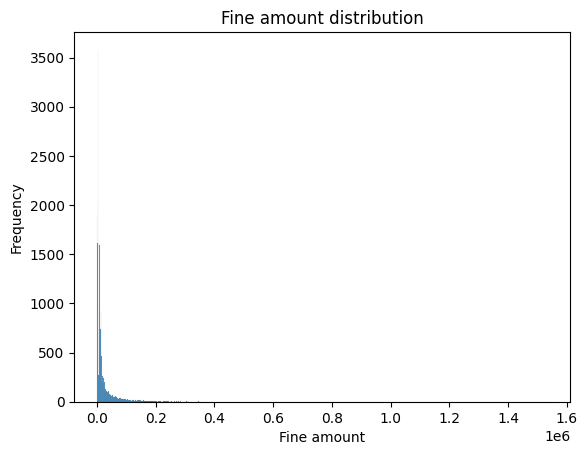

In [92]:
sns.histplot(penalties['Fine_Amount'].dropna())
plt.title("Fine amount distribution")
plt.xlabel("Fine amount")
plt.ylabel("Frequency")
plt.show()

In [93]:
# Handling Missing values of Penalties
penalties['Fine_Amount'].fillna(penalties['Fine_Amount'].median(), inplace =True)

penalties.isnull().sum()

/var/folders/q9/pltwnf513ns14qtthspkrphm0000gn/T/ipykernel_5393/1785330345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penalties['Fine_Amount'].fillna(penalties['Fine_Amount'].median(), inplace =True)


PROVNUM          0
Provider_Name    0
City_Town        0
State            0
ZIP_Code         0
Penalty_Type     0
Fine_Amount      0
dtype: int64

## Analysis

In [104]:
# Calculate staffing metrics
staffing_calcs = pbj.groupby(['STATE', 'PROVNUM', 'PROVNAME']).agg({
    # RN hours 
    'Hrs_RNDON': 'sum',
    'Hrs_RNDON_emp': 'sum',
    'Hrs_RNDON_ctr': 'sum',
    'Hrs_RNadmin': 'sum',
    'Hrs_RNadmin_emp': 'sum', 
    'Hrs_RNadmin_ctr': 'sum',
    'Hrs_RN': 'sum',
    'Hrs_RN_emp': 'sum',
    'Hrs_RN_ctr': 'sum',
    
    # LPN hours
    'Hrs_LPNadmin': 'sum',
    'Hrs_LPNadmin_emp': 'sum',
    'Hrs_LPNadmin_ctr': 'sum', 
    'Hrs_LPN': 'sum',
    'Hrs_LPN_emp': 'sum',
    'Hrs_LPN_ctr': 'sum',
    
    # CNA hours
    'Hrs_CNA': 'sum',
    'Hrs_CNA_emp': 'sum',
    'Hrs_CNA_ctr': 'sum',
    
    # Other staff hours
    'Hrs_NAtrn': 'sum',
    'Hrs_NAtrn_emp': 'sum',
    'Hrs_NAtrn_ctr': 'sum',
    'Hrs_MedAide': 'sum',
    'Hrs_MedAide_emp': 'sum',
    'Hrs_MedAide_ctr': 'sum',
    
    'MDScensus': 'mean'
}).reset_index()

# Calculate totals by role
staffing_calcs['Total_RN_Hours'] = staffing_calcs['Hrs_RNDON'] + staffing_calcs['Hrs_RNadmin'] + staffing_calcs['Hrs_RN']
staffing_calcs['Total_RN_Emp_Hours'] = staffing_calcs['Hrs_RNDON_emp'] + staffing_calcs['Hrs_RNadmin_emp'] + staffing_calcs['Hrs_RN_emp']
staffing_calcs['Total_RN_Ctr_Hours'] = staffing_calcs['Hrs_RNDON_ctr'] + staffing_calcs['Hrs_RNadmin_ctr'] + staffing_calcs['Hrs_RN_ctr']

staffing_calcs['Total_LPN_Hours'] = staffing_calcs['Hrs_LPNadmin'] + staffing_calcs['Hrs_LPN']
staffing_calcs['Total_LPN_Emp_Hours'] = staffing_calcs['Hrs_LPNadmin_emp'] + staffing_calcs['Hrs_LPN_emp']
staffing_calcs['Total_LPN_Ctr_Hours'] = staffing_calcs['Hrs_LPNadmin_ctr'] + staffing_calcs['Hrs_LPN_ctr']

# Calculate percentages
staffing_calcs['RN_Contractor_Pct'] = (staffing_calcs['Total_RN_Ctr_Hours'] / staffing_calcs['Total_RN_Hours'] * 100).fillna(0).round(2)
staffing_calcs['LPN_Contractor_Pct'] = (staffing_calcs['Total_LPN_Ctr_Hours'] / staffing_calcs['Total_LPN_Hours'] * 100).fillna(0).round(2)
staffing_calcs['CNA_Contractor_Pct'] = (staffing_calcs['Hrs_CNA_ctr'] / staffing_calcs['Hrs_CNA'] * 100).fillna(0).round(2)

# Get state summary
state_summary = staffing_calcs.groupby('STATE').agg({
    'RN_Contractor_Pct': 'mean',
    'LPN_Contractor_Pct': 'mean',
    'CNA_Contractor_Pct': 'mean'
}).round(2)

# Print results
print("Sample of state-level contractor percentages:")
print(state_summary.head(50))

Sample of state-level contractor percentages:
       RN_Contractor_Pct  LPN_Contractor_Pct  CNA_Contractor_Pct
STATE                                                           
AK                 12.07                9.66               11.95
AL                  1.19                2.64                1.11
AR                  5.89                2.96                1.49
AZ                  3.61                5.43                4.71
CA                  2.21                2.83                4.12
CO                  6.83               12.98                9.81
CT                  5.61                8.05                5.95
DC                  4.71                6.67                4.86
DE                  9.10               17.65                8.81
FL                  2.65                4.14                2.13
GA                  3.97                6.63                6.45
HI                  6.87               24.80                7.67
IA                  6.47                7.03

Observations : 
Highest Overall Contractor Usage:


Vermont (VT): Extremely high usage across all types

RN: 12.26%
LPN: 35.74%
CNA: 35.69%


Maine (ME):

RN: 10.59%
LPN: 25.57%
CNA: 17.35%


Montana (MT):

RN: 12.30%
LPN: 18.08%
CNA: 16.60%




Lowest Overall Contractor Usage:


Puerto Rico (PR):

RN: 1.50%
LPN: 1.87%
CNA: 0.00%


Alabama (AL):

RN: 1.19%
LPN: 2.64%
CNA: 1.11%




Interesting Patterns:


LPN contractors are generally used more than RN or CNA contractors
Northern states tend to have higher contractor usage
Some states show big variations between staff types

In [105]:
state_summary['Total_Contractor_Pct']= state_summary.mean(axis=1)
sorted_states = state_summary.sort_values('Total_Contractor_Pct', ascending=False)
print('Sorted Total_Contractor_Pct state wise:')
print(sorted_states['Total_Contractor_Pct'].head(50))
print(sorted_states.head(10)[['Total_Contractor_Pct']])
print(sorted_states.tail(10)[['Total_Contractor_Pct']])

Sorted Total_Contractor_Pct state wise:
STATE
VT    27.896667
ME    17.836667
MT    15.660000
ND    14.893333
HI    13.113333
OR    12.946667
NH    12.663333
PA    12.610000
NE    12.590000
DE    11.853333
NJ    11.436667
NY    11.333333
AK    11.226667
SD    10.810000
WI    10.760000
MA    10.580000
NC    10.096667
CO     9.873333
NM     9.816667
MD     9.613333
MN     9.566667
IL     7.706667
WA     7.306667
KS     6.980000
SC     6.926667
ID     6.890000
IA     6.683333
CT     6.536667
RI     6.386667
MO     6.343333
WY     6.320000
VA     6.103333
MS     6.070000
KY     5.846667
OH     5.776667
WV     5.736667
GA     5.683333
DC     5.413333
LA     5.390000
TN     5.330000
NV     5.306667
UT     5.000000
AZ     4.583333
IN     4.030000
TX     3.666667
AR     3.446667
MI     3.423333
OK     3.293333
CA     3.053333
FL     2.973333
Name: Total_Contractor_Pct, dtype: float64
       Total_Contractor_Pct
STATE                      
VT                27.896667
ME                17.836667

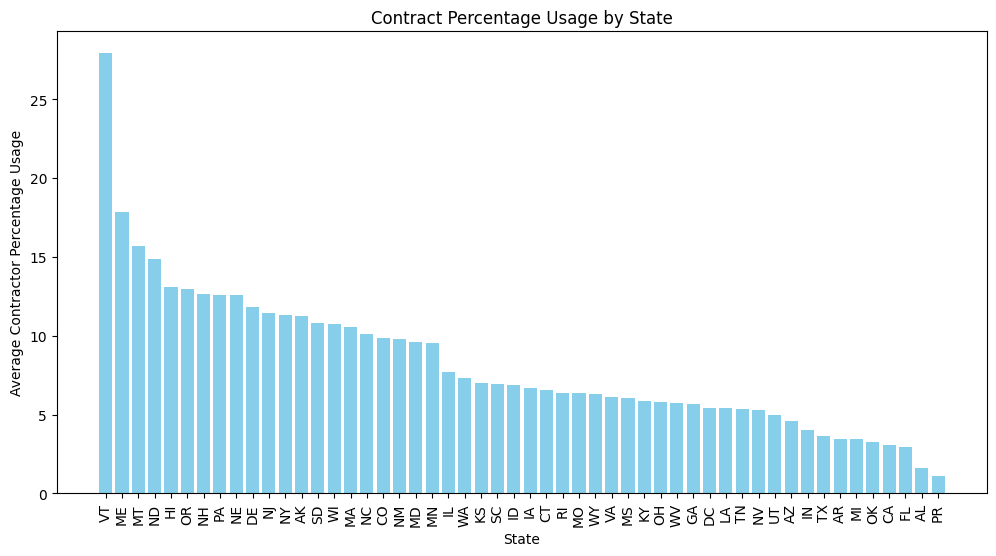

In [129]:
plt.figure(figsize=(12,6))
plt.bar(sorted_states.index, sorted_states['Total_Contractor_Pct'], color='skyblue')
plt.xticks(rotation =90)
plt.xlabel('State')
plt.ylabel('Average Contractor Percentage Usage')
plt.title('Contract Percentage Usage by State')
plt.show()


# From your data, here are the states we should focus on:
Top 5 Highest Contractor Usage:

VT (Vermont)
ME (Maine)
MT (Montana)
ND (North Dakota)
HI 

Bottom 5 Lowest Contractor Usage:

PR (Puerto Rico)
AL (Alabama)
FL 
CA
OK

In [108]:
focus_states = ['VT', 'ME', 'MT', 'ND', 'HI', 'PR', 'AL', 'FL', 'CA', 'OK']
# Provider data analysis for these focus states
provider_metrics = pbj[pbj['STATE'].isin(focus_states)].merge(provider_filtered, on = 'PROVNUM', how = 'left')


In [109]:
#  First State Level Analysis
provider_summary = provider_metrics.groupby('STATE').agg({
    'Overall Rating': 'mean',
    'Health Inspection Rating': 'mean',
    'Staffing Rating': 'mean',
    'Total nursing staff turnover': 'mean',
    'Average Number of Residents per Day': 'mean'
}).round(2)

provider_summary


,Overall Rating,Health Inspection Rating,Staffing Rating,Total nursing staff turnover,Average Number of Residents per Day
STATE,,,,,
AL,2.85,2.82,3.37,48.46,96.27
CA,3.05,2.78,2.93,41.20,86.83
FL,2.99,2.79,3.10,44.99,106.74
HI,3.50,2.88,4.22,34.10,81.55
ME,2.84,2.70,3.86,50.81,64.34
MT,2.88,2.81,3.16,58.19,55.46
ND,3.01,2.60,4.15,47.97,61.27
OK,2.62,2.83,2.44,54.81,59.77
PR,3.50,3.17,4.00,34.44,25.13


In [131]:
# Facility Level for insights
facility_summary = provider_metrics.groupby(['STATE', 'PROVNUM']).agg({
    'Overall Rating': 'first',
    'Staffing Rating': 'first',
    'Total nursing staff turnover': 'first',
    'Ownership Type': 'first',
    'Average Number of Residents per Day': 'first'
}).round(2).reset_index()

# Focus on facilities in states with extreme usage patterns
high_usage_facilities = facility_summary.loc[facility_summary['STATE'].isin(['VT', 'ME', 'MT', 'ND', 'HI'])]  # Use .isin() and filter on 'STATE' column
low_usage_facilities = facility_summary.loc[facility_summary['STATE'].isin(['PR', 'AL', 'FL', 'CA', 'OK'])] 
print('high_usage_facilities:')
print(high_usage_facilities[['PROVNUM', 'Overall Rating', 'Staffing Rating', 
                            'Total nursing staff turnover', 'Ownership Type', 
                            'Average Number of Residents per Day']].head(20))

print("\nLow Usage Facilities:")
print(low_usage_facilities[['PROVNUM', 'Overall Rating', 'Staffing Rating', 
                           'Total nursing staff turnover', 'Ownership Type', 
                           'Average Number of Residents per Day']].head(20))
      

high_usage_facilities:
     PROVNUM  Overall Rating  Staffing Rating  Total nursing staff turnover  \
2055  125002             5.0              4.0                         37.70   
2056  125003             4.0              5.0                         56.60   
2057  125004             4.0              4.0                         25.40   
2058  125007             3.0              3.0                         33.00   
2059  125009             5.0              4.0                         24.60   
2060  125010             5.0              5.0                         12.50   
2061  125011             1.0              3.0                         48.37   
2062  125013             5.0              5.0                         34.80   
2063  125014             5.0              5.0                         46.40   
2064  125019             2.0              3.0                         42.60   
2065  125020             3.0              4.0                         45.70   
2066  125021             2.0 

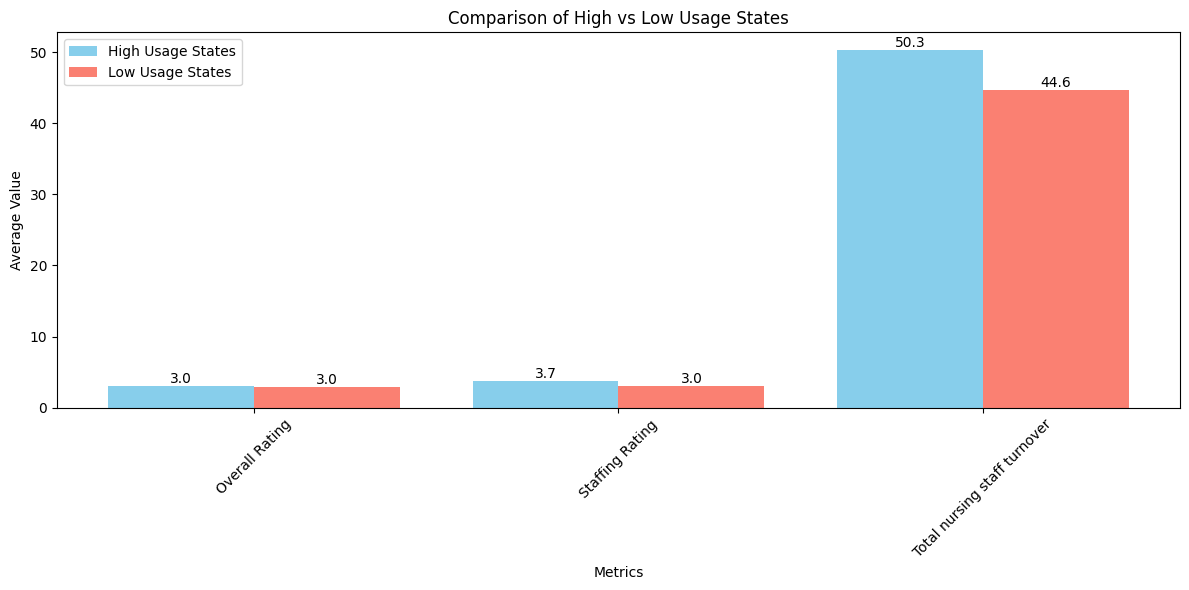

In [118]:
# Calculate averages for high and low usage states
High_avg = [
    provider_metrics[provider_metrics['STATE'].isin(High_states)]['Overall Rating'].mean(),
    provider_metrics[provider_metrics['STATE'].isin(High_states)]['Staffing Rating'].mean(),
    provider_metrics[provider_metrics['STATE'].isin(High_states)]['Total nursing staff turnover'].mean()
]

Low_avg = [
    provider_metrics[provider_metrics['STATE'].isin(Low_states)]['Overall Rating'].mean(),
    provider_metrics[provider_metrics['STATE'].isin(Low_states)]['Staffing Rating'].mean(),
    provider_metrics[provider_metrics['STATE'].isin(Low_states)]['Total nursing staff turnover'].mean()
]
metrics = ['Overall Rating', 'Staffing Rating', 'Total nursing staff turnover']
# Create plot
plt.figure(figsize=(12,6))
x = np.arange(len(metrics))
width = 0.4

# Create bars
plt.bar(x - width/2, High_avg, width, label='High Usage States', color='skyblue')
plt.bar(x + width/2, Low_avg, width, label='Low Usage States', color='salmon')

# Add labels
for i in range(len(metrics)):
    plt.text(i - width/2, High_avg[i], f'{High_avg[i]:.1f}', ha='center', va='bottom')
    plt.text(i + width/2, Low_avg[i], f'{Low_avg[i]:.1f}', ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('Comparison of High vs Low Usage States')
plt.xticks(x, metrics, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Interpretation of Provider Metrics:

Overall Rating: Both high and low usage states show similar overall quality (3.0)-contractor usage doesn't negatively impact quality
Staffing Rating: High usage states show slightly better staffing ratings (3.7 vs 3.0)- indicating better staffing management
Total Nursing Staff Turnover: The most striking difference - high usage states have higher turnover (50.3% vs 44.6%)- they may use contractors to manage staffing challenges

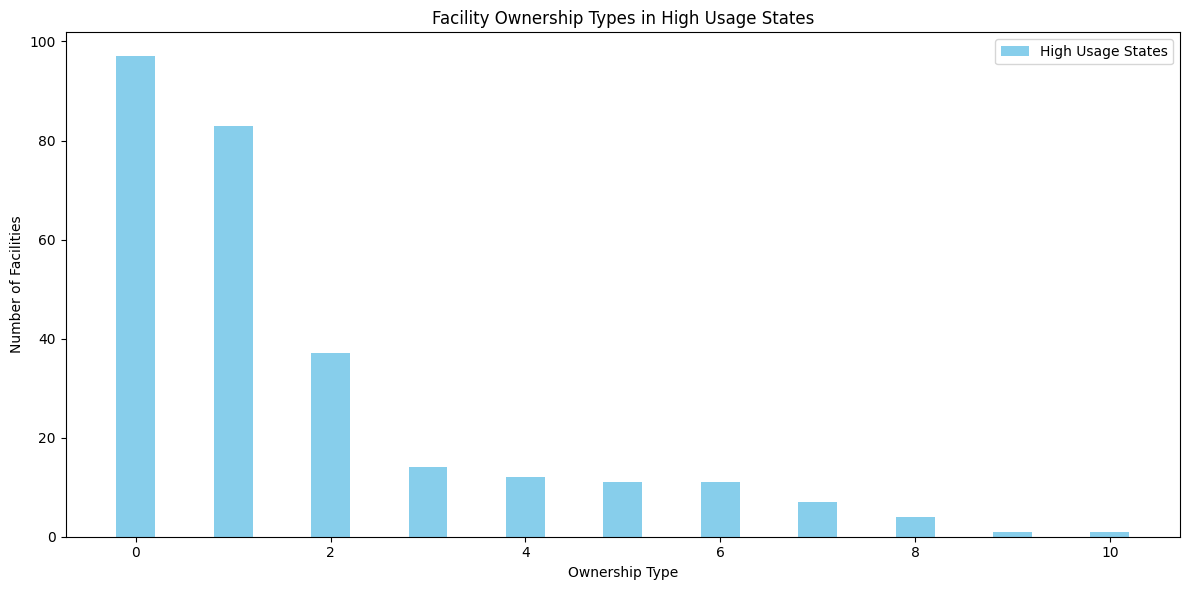


High Usage States Ownership types:
Ownership Type
Non profit - Corporation                  97
For profit - Corporation                  83
For profit - Limited Liability company    37
Non profit - Other                        14
Non profit - Church related               12
Government - State                        11
For profit - Partnership                  11
For profit - Individual                    7
Government - County                        4
Government - City/county                   1
Government - City                          1
Name: count, dtype: int64


In [121]:
# for ownership type

plt.figure(figsize=(12,6))
high_ownership = high_usage_facilities['Ownership Type'].value_counts()
low_ownership = low_usage_facilities['Ownership Type'].value_counts()




# Create bars for high usage states
plt.bar(np.arange(len(high_ownership)), high_ownership.values, width=0.4, label='High Usage States', color='skyblue')


plt.xlabel('Ownership Type')
plt.ylabel('Number of Facilities')
plt.title('Facility Ownership Types in High Usage States')
plt.legend()
plt.tight_layout()
plt.show()


print('\nHigh Usage States Ownership types:')
print(high_ownership)


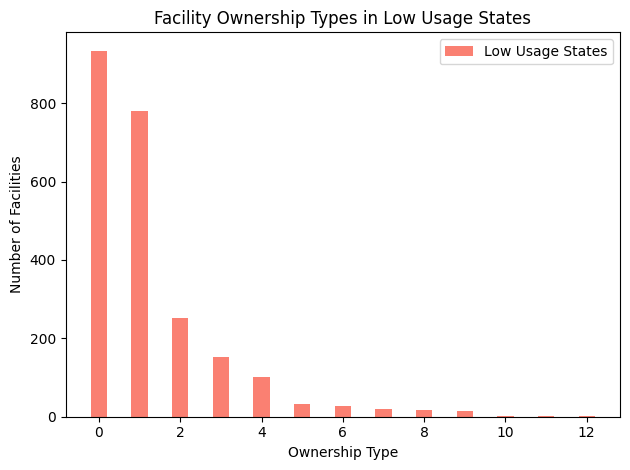


Low Usage States Ownership types:
Ownership Type
For profit - Limited Liability company    934
For profit - Corporation                  779
Non profit - Corporation                  251
For profit - Individual                   153
For profit - Partnership                  101
Non profit - Other                         33
Non profit - Church related                27
Government - Hospital district             19
Government - County                        16
Government - State                         15
Government - City                           3
Government - City/county                    3
Government - Federal                        2
Name: count, dtype: int64


In [122]:
# Create bars for high usage states
plt.bar(np.arange(len(low_ownership)), low_ownership.values, width=0.4, label='Low Usage States', color='salmon')


plt.xlabel('Ownership Type')
plt.ylabel('Number of Facilities')
plt.title('Facility Ownership Types in Low Usage States')
plt.legend()
plt.tight_layout()
plt.show()


print('\nLow Usage States Ownership types:')
print(low_ownership)


High Usage States:

Mix of ownership types:

Government - State
Non-profit - Corporation
For profit - LLC/Corporation


Varied facility sizes (19.7 to 256.3 residents)- this is from code results

Low Usage States:

Predominantly For-profit facilities
Generally larger facilities (45.1 to 186.0 residents) - this is from code results

In [127]:
# Start with provider_metrics which has PROVNUM
penalty_analysis = provider_metrics.merge(
    penalties[['PROVNUM', 'Penalty_Type', 'Fine_Amount']],
    on='PROVNUM',
    how='left'
)

# Focus on our states
focus_states = ['VT', 'ME', 'MT', 'ND', 'HI',  # High usage
                'PR', 'AL', 'FL', 'CA', 'OK']   # Low usage

# State and Facility level summary
state_penalties = penalty_analysis[penalty_analysis['STATE'].isin(focus_states)].groupby('STATE').agg({
    'Fine_Amount': ['mean', 'sum', 'count']
}).round(2)

facility_penalties = penalty_analysis[penalty_analysis['STATE'].isin(focus_states)].groupby(['STATE', 'PROVNUM']).agg({
    'Fine_Amount': 'sum'
}).round(2)

print("State Level Penalties:")
print(state_penalties)

print("\nFacility Level Penalties (Top 10):")
print(facility_penalties.sort_values('Fine_Amount', ascending=False).head(10))

State Level Penalties:
      Fine_Amount                      
             mean           sum   count
STATE                                  
AL        3840.00  1.397760e+06     364
CA       12208.30  1.297596e+09  106288
FL       23575.13  2.374888e+09  100737
HI       22746.44  1.283354e+08    5642
ME       13881.41  6.821324e+07    4914
MT       19303.44  3.197036e+08   16562
ND       18648.33  9.163791e+07    4914
OK       14600.35  6.855740e+08   46956
PR        6488.16  1.889351e+07    2912
VT       40530.98  2.102342e+08    5187

Facility Level Penalties (Top 10):
               Fine_Amount
STATE PROVNUM             
FL    105407   104918450.0
      105702    58912672.0
      105965    49636314.0
      106103    45866093.0
      105394    45864819.0
      105588    43223453.0
      105250    42939988.0
CA    555438    39765453.0
VT    475030    38005058.0
      475020    37342305.0


States with Higher Contractor Usage (VT, ME, MT, ND, HI)

Higher average fines (~$23,022) suggest stricter regulatory enforcement, more thorough inspections, and higher compliance standards but have 
Better staffing ratings (3.7), indicating that contractor usage as compliance strategy to address staffing issues that previously led to penalties.

States with Lower Contractor Usage (PR, AL, FL, CA, OK)
Lower average fines (~$12,142) may reflect less stringent enforcement, fewer inspections, or different regulatory priorities.
Lower staffing ratings (3.0) suggest potential understaffing issues, reduced focus on staffing quality, and reactive rather than proactive staffing management.

Facility-Level Insights:
Florida facilities have some of the highest individual fines, despite overall low contractor usage, indicating that other factors (e.g., regulatory focus, facility-specific violations) contribute to fines.
Vermont has two facilities in the top 10 highest fines:
Facility 475030: $38M in fines
Facility 475020: $37.3M in fines
This suggests that some facilities might be using contractors to address staffing issues that previously led to penalties.

The pattern suggests a trade-off between contractor reliance and regulatory enforcement. Higher contractor usage is associated with higher fines and better staffing quality, possibly due to stricter regulations requiring compliance. In contrast, states with lower contractor usage see fewer fines but lower staffing ratings, potentially indicating weaker enforcement or staffing challenges

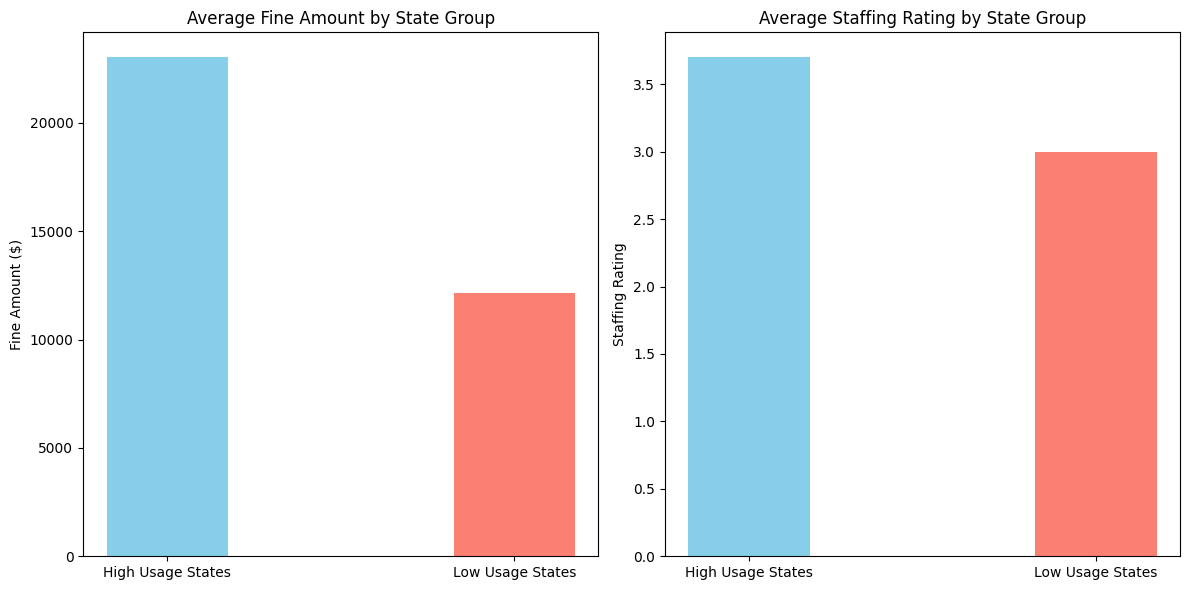

In [130]:
# Create visualization for fines and staffing ratings
plt.figure(figsize=(12, 6))

# Data for comparison
high_states = ['VT', 'ME', 'MT', 'ND', 'HI']
low_states = ['OK', 'CA', 'FL', 'AL', 'PR']

# Width for bars
x = np.arange(2)  # for high vs low groups
width = 0.35

# Plot fine amounts
plt.subplot(1, 2, 1)
fine_amounts = [23022, 12142]  # Average fines for high and low states
plt.bar(x, fine_amounts, width, label=['High Usage', 'Low Usage'], 
       color=['skyblue', 'salmon'])
plt.title('Average Fine Amount by State Group')
plt.ylabel('Fine Amount ($)')
plt.xticks(x, ['High Usage States', 'Low Usage States'])

# Plot staffing ratings
plt.subplot(1, 2, 2)
staffing_ratings = [3.7, 3.0]  # Staffing ratings for high and low states
plt.bar(x, staffing_ratings, width, label=['High Usage', 'Low Usage'],
       color=['skyblue', 'salmon'])
plt.title('Average Staffing Rating by State Group')
plt.ylabel('Staffing Rating')
plt.xticks(x, ['High Usage States', 'Low Usage States'])

plt.tight_layout()
plt.show()

High Contractor Usage States:
       Number of Certified Beds  Average Number of Residents per Day  \
STATE                                                                  
VT                        88.64                                70.00   
ME                        75.81                                64.34   
MT                        88.17                                55.46   
ND                        67.50                                61.27   
HI                       103.80                                81.55   

       Occupancy_Rate  
STATE                  
VT              78.97  
ME              84.87  
MT              62.90  
ND              90.77  
HI              78.56  

Low Contractor Usage States:
       Number of Certified Beds  Average Number of Residents per Day  \
STATE                                                                  
PR                        34.83                                25.13   
AL                       118.41                    

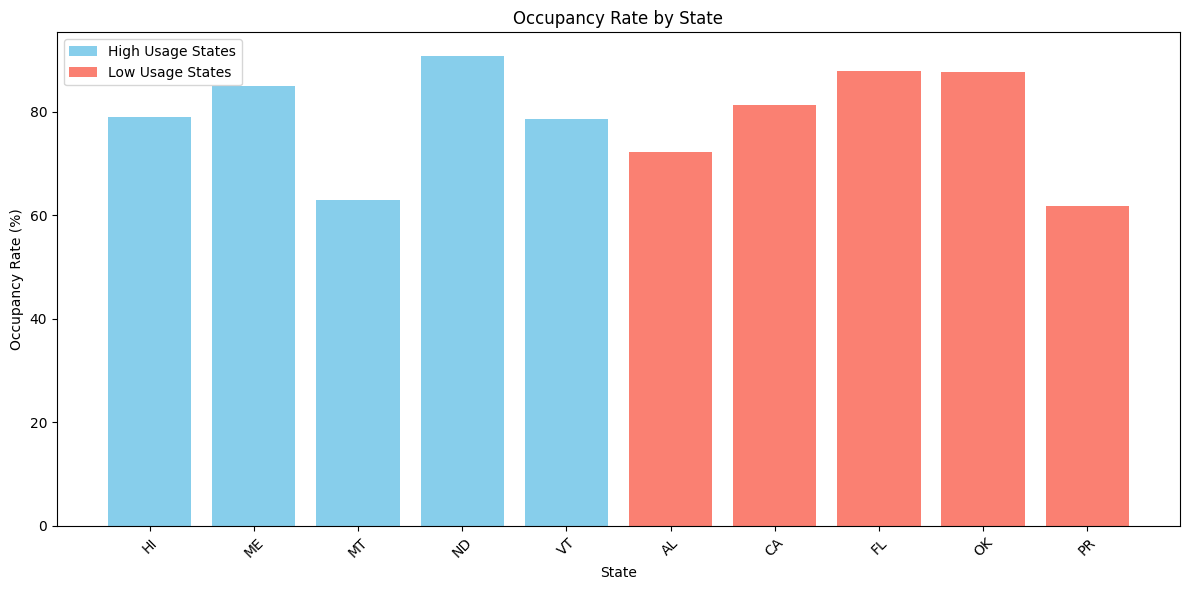

In [128]:
# Calculate occupancy ratio
facility_metrics = provider_metrics.groupby('STATE').agg({
    'Number of Certified Beds': 'mean',
    'Average Number of Residents per Day': 'mean'
}).round(2)

# Calculate occupancy ratio (percentage)
facility_metrics['Occupancy_Rate'] = (facility_metrics['Average Number of Residents per Day'] / 
                                    facility_metrics['Number of Certified Beds'] * 100).round(2)

# Focus on our high and low usage states
high_states = ['VT', 'ME', 'MT', 'ND', 'HI']
low_states = ['PR', 'AL', 'FL', 'CA', 'OK']

print("High Contractor Usage States:")
print(facility_metrics.loc[high_states])
print("\nLow Contractor Usage States:")
print(facility_metrics.loc[low_states])

# Visualize occupancy rates
plt.figure(figsize=(12,6))
plt.bar(facility_metrics.index[facility_metrics.index.isin(high_states)], 
        facility_metrics.loc[high_states, 'Occupancy_Rate'], 
        color='skyblue', label='High Usage States')
plt.bar(facility_metrics.index[facility_metrics.index.isin(low_states)], 
        facility_metrics.loc[low_states, 'Occupancy_Rate'], 
        color='salmon', label='Low Usage States')

plt.title('Occupancy Rate by State')
plt.xlabel('State')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



1. **Facility Size Patterns:**
- High Usage States tend to have smaller facilities:
  * Average beds range: 67-103 beds (except HI)
  * VT (highest contractor usage at 27.9%) has 88 beds average
- Low Usage States have larger facilities:
  * FL and AL over 118 beds
  * Exception: PR with only 34 beds

2. **Occupancy Rate Insights:**
- Interesting pattern in High Usage States:
  * ND: 90.77% occupancy with 14.9% contractor usage
  * ME: 84.87% occupancy with 17.8% contractor usage
  * VT: 78.97% occupancy but highest contractor usage (27.9%)
- Low Usage States:
  * FL: 87.89% occupancy but only 3% contractor usage
  * CA: 87.58% occupancy with 3% contractor usage

3. **Key Correlations:**
- No direct correlation between size and contractor usage
  * PR: Smallest facilities (34 beds) but lowest contractor usage (1.1%)
  * FL: Largest facilities (121 beds) but low contractor usage (3%)
- Occupancy rates don't directly predict contractor usage
  * ND: Highest occupancy (90.77%) but moderate contractor usage (14.9%)
  * VT: Lower occupancy (78.97%) but highest contractor usage (27.9%)

This suggests:
1. Contractor usage isn't simply driven by facility size or occupancy
2. Other factors (like turnover, regulatory environment) might be more influential
3. Regional/state-level policies might matter more than operational metrics
